<a href="https://colab.research.google.com/github/volinhbao/CS112.L11.KHTN/blob/master/Week%205/Kh%C3%B3a_S%E1%BB%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NHÓM 7**
| STT |Họ và tên            | Description |Role|
| ----| --------------------|------------ |----|
| 1   | Nguyễn Quốc Cường   | 18520206|Leader|
| 2   | Nguyễn Trung Hiếu   | 1852|Member|
| 3   | Võ Linh Bảo         | 18520503|Member|

#**KHÓA SỐ (0.15s, 100MB)**

Để tăng độ an toàn chống hiện tượng cướp ngân hàng ngày càng phổ biến người ta dùng khóa số với mã mở khóa đơn giản nhưng rất hiệu quả. Trên cửa ra vào hiển thị một xâu khá dài các ký tự số. Các chữ số có thể di chuyển đổi chổ cho nhau hoặc bị xóa. Muốn mở khóa người ta phải di chuyển các chữ số và trong trường hợp cần thiết – xóa vài chữ số để nhận được xâu lớn nhất thỏa mãn điều kiện đã cài đặt. Điều kiện này được thay đổi thường xuyên. Hôm nay điều kiện đó là “Số nhận được phải chia hết cho $3$. Số nhận được có thể bắt đầu bằng các chữ số 0. Xâu “$000$” sẽ lớn hơn xâu “$00$”.

**Hãy xác định khóa mở cửa.**

> **Dữ liệu**: Vào từ thiết bị nhập chuẩn gồm một xâu ký tự số có độ dài lớn hơn $2$ và không vượt quá $10^5$.

> **Kết quả**: Đưa ra thiết bị xuất chuẩn xâu khóa mở cửa.

> **Ví dụ:**


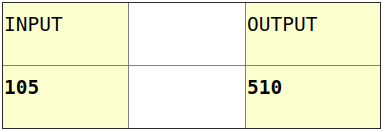

# Abstraction:
Tìm cách xóa 1 số ký tự (có thể không xóa) và hoán vị các ký tự còn lại từ 1 xâu ký tự số sao cho xâu kết quả có tổng các ký tự chia hết cho 3 và xâu có giá trị lớn nhất

#Decomposition:
Yêu cầu bài toán gồm 2 thành phần chính:
- Xóa 1 số ký tự để tổng các ký tự còn lại chia hết cho 3
- Hoán vị các ký tự còn lại  
Kết quả từ 2 bước trên cần phải lớn nhất

# Pattern recognition:
- Bài toán có đầu vào là 1 xâu  
$\rightarrow$ dạng bài xử lý chuỗi
- Yêu cầu tìm cách để tổng chữ số chia hết cho 3   
$\rightarrow$ dạng bài số học  

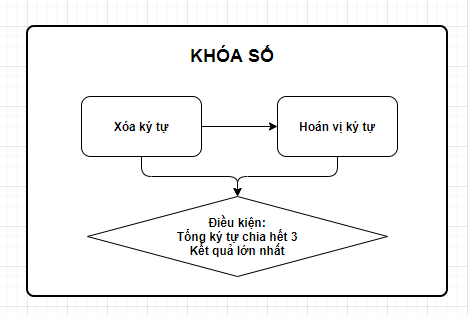


# Algorithm design:
**Đánh giá 1**: Xâu ký tự input có tổng ký tự rơi vào 3 trường hợp
- Chia hết cho 3: Không cần xóa
- Chia cho 3 dư 1: Xóa 1 số chia 3 dư 1 hoặc xóa 2 số chia 3 dư 2 (nếu đủ số lượng để xóa)
- Chia cho 3 dư 2: Xóa 1 số chia 3 dư 2 hoặc xóa 2 số chia 3 dư 1 (nếu đủ số lượng để xóa)  

**Đánh giá 2**: Trong 2 trường hợp tổng chuỗi ban đầu không chia hết (dư 1 hoặc dư 2), trong 2 lựa chọn tương ứng mỗi trường hợp (chỉ xét 1 lựa chọn nếu lựa chọn đó có đủ số ký tự cần thiết để xóa), ta ưu tiên lựa chọn xóa 1 số. Bởi vì sau khi xóa 1 số, ta luôn tạo được kết quả lớn hơn lựa chọn xóa 2 số (vì số chữ số còn lại lớn hơn)  

**Đánh giá 3**: Ta có thể chọn xóa các ký tự nhỏ nhất có thể và sắp xếp các ký tự còn lại theo thứ tự giảm dần để thu được kết quả lớn nhất

**Giải thuật**
- Bước 1: Đọc chuỗi đầu vào, đếm số lần xuất hiện của từng chữ số
- Bước 2: Kiểm tra chuỗi input thuộc trường hợp nào trong 3 trường hợp
- Bước 3: Nếu thuộc trường hợp 2 hoặc 3, tiến hành xóa bằng 1 trong 2 lựa chọn
- Bước 4: Sắp xếp giảm dần các ký tự còn lại 

# Pseudo code in python
```
input --> s
count number of occurences of each digit
sum = sum of digit in s
if sum % 3 == 0:
  pass
elif sum % 3 == 1:
  if (number of digit mod 3 = 1) > 0:
    delete minimum digit mod 3 = 1
  else:
    delete 2 minimum digit mod 3 = 2
else:
  if (number of digit mod 3 = 2) > 0:
    delete minimum digit mod 3 = 2
  else:
    delete 2 minimum digit mod 3 = 1
sort remain digit in descending order
output <-- s
```

# Execution

In [4]:
s = input().strip()
a = [int(x) for x in s]
cnt = {}
for i in range(0,10):
	cnt[i] = 0
S = sum(a)
for num in a:
	cnt[num] += 1

def output():
	ls = []
	for i in range(9,-1,-1):
		for j in range(cnt[i]):
			ls.append(str(i))
	print(''.join(ls))

if S%3 == 0:
	output()
elif S%3 == 1:
	if cnt[1]:
		cnt[1] -= 1
	elif cnt[4]:
		cnt[4] -= 1
	elif cnt[7]:
		cnt[7] -= 1
	else:
		tmp = 0
		for i in [2,5,8]:
			if tmp == 2:
				break
			residual = min(2-tmp,cnt[i])
			tmp += residual
			cnt[i] -= residual
	output()
else:
	if cnt[2]:
		cnt[2] -= 1
	elif cnt[5]:
		cnt[5] -= 1
	elif cnt[8]:
		cnt[8] -= 1
	else:
		tmp = 0
		for i in [1,4,7]:
			if tmp == 2:
				break
			residual = min(2-tmp,cnt[i])
			tmp += residual
			cnt[i] -= residual
	output()

015
510
